In [74]:
import pandas as pd
import matplotlib.pyplot as plt

""" 
index_col=0, -Define the colum to be used as index col
parse_dates=True- convert resulting dates in colum to time stamps
"""
air_quality = pd.read_csv('data/air_quality_no2.csv',index_col=0,parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


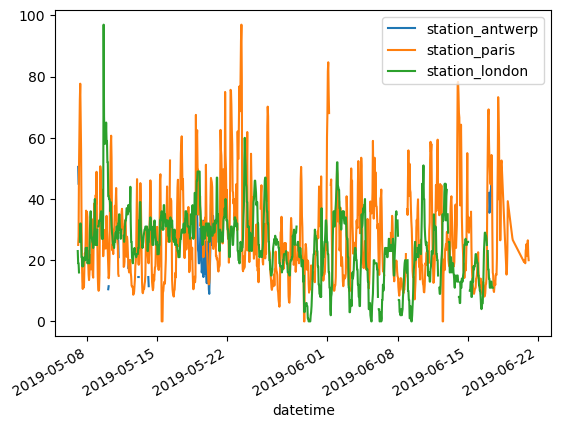

In [75]:
 #How to create plots in pandas? 
air_quality.plot()
plt.show()


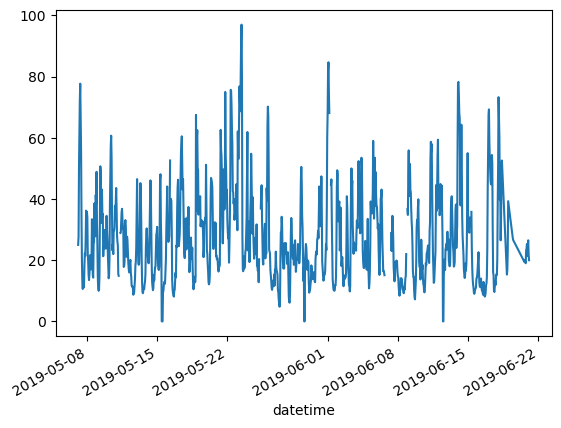

In [76]:

air_quality['station_paris'].plot()
plt.show() 

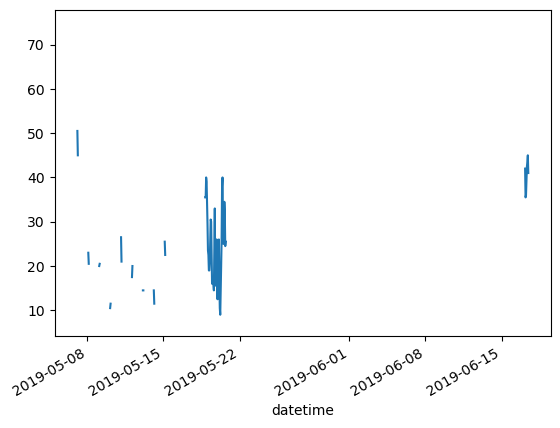

In [77]:
air_quality['station_antwerp'].plot()
plt.show() 

<Axes: xlabel='station_london', ylabel='station_paris'>

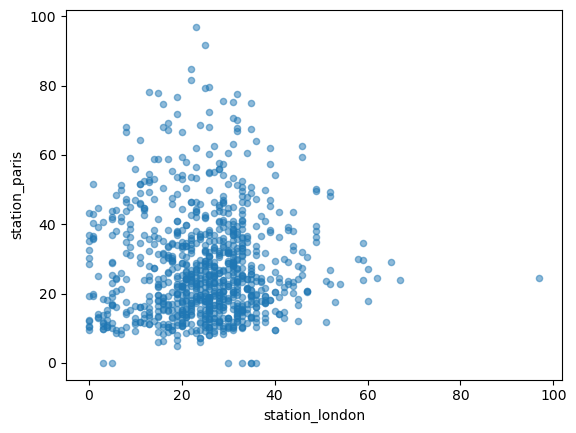

In [78]:
""" 
To plot a specific column, use the selection method of the subset data tutorial in combination with the plot() method.
Hence, the plot() method works on both Series and DataFrame.
I want to visually compare the 𝑁02 values measured in London versus Paris.
"""

air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

In [79]:
# Other plots.

[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

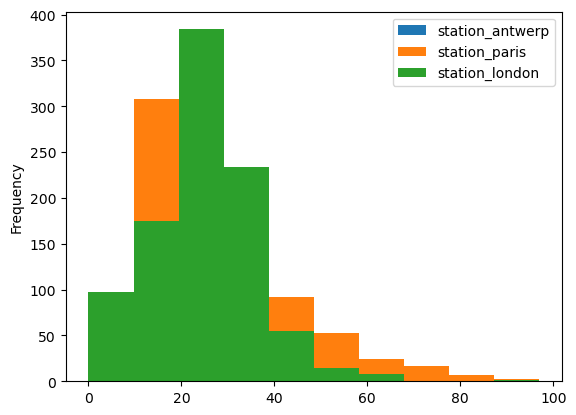

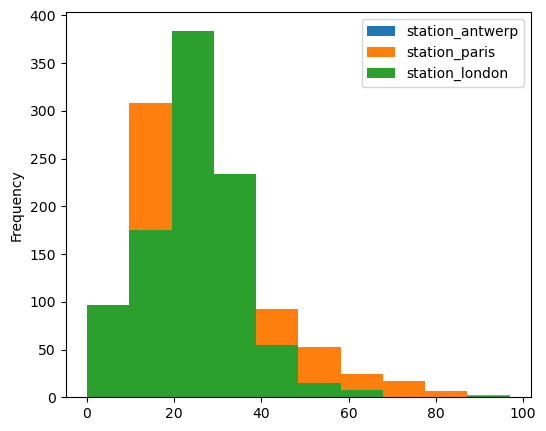

In [80]:
air_quality.plot.hist()
plt.show() 

#or

air_quality.plot(kind='hist', figsize=(6,5))
plt.show() 

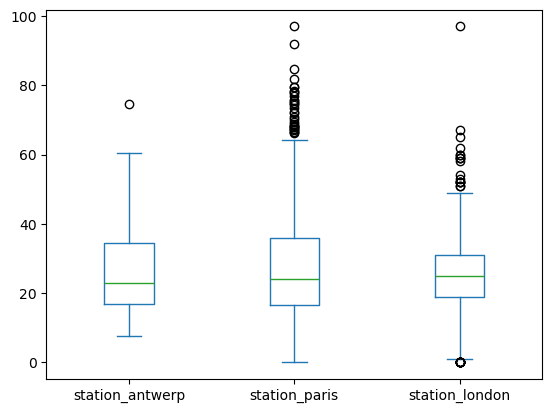

In [81]:
air_quality.plot.box()
plt.show() 

<Axes: xlabel='station_london', ylabel='station_paris'>

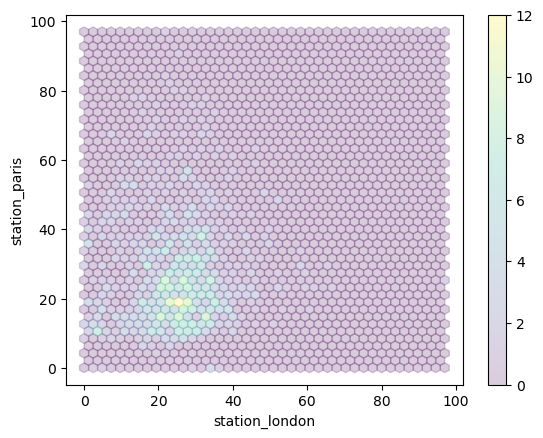

In [82]:

air_quality.plot.hexbin(x="station_london", y="station_paris", alpha=0.2, gridsize=40, cmap='viridis')

<!-- Separate subplots for each of the data columns are supported by the subplots argument of the plot functions. The
builtin options available in each of the pandas plot functions are worth reviewing.
Some more formatting options are explained in the user guide section on plot formatting -->

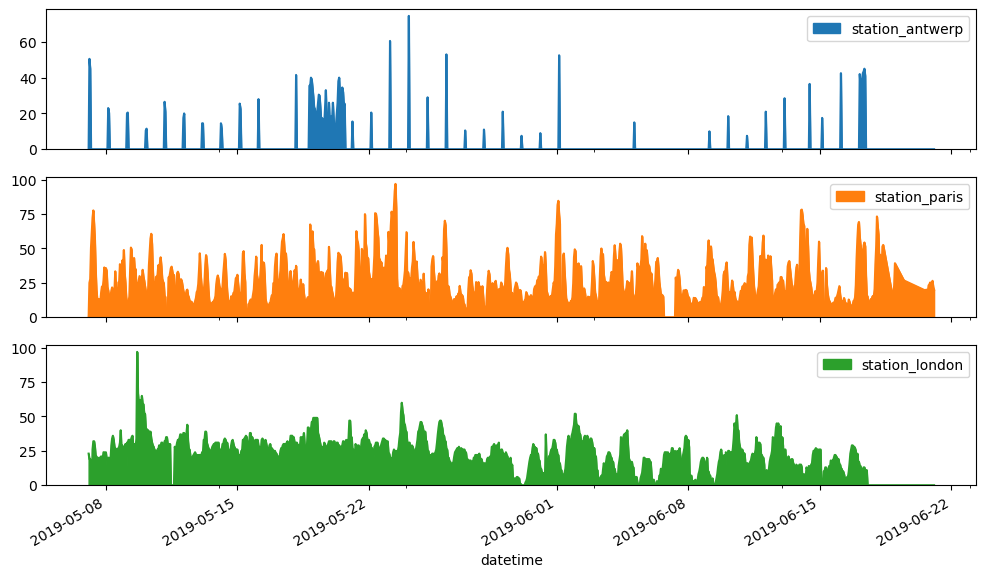

In [83]:
#I want each of the columns in a separate subplot.
axs = air_quality.plot.area(figsize=(12,7),subplots=True)

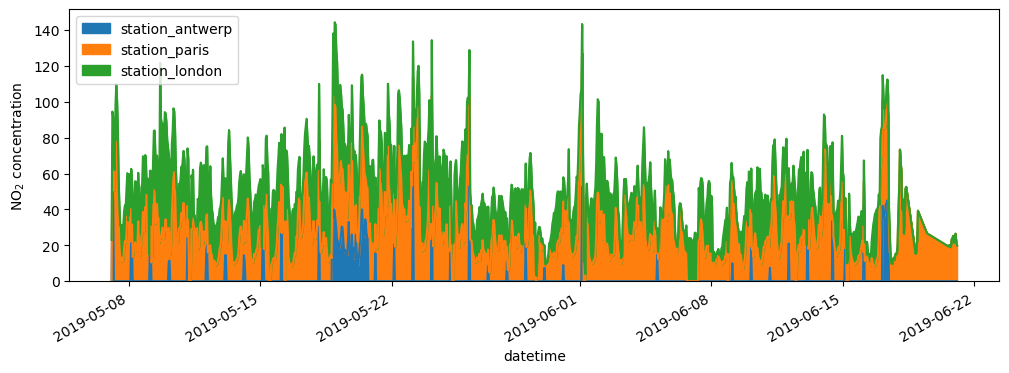

In [84]:
""" 
    Each of the plot objects created by pandas is a matplotlib object. As Matplotlib provides plenty of options to customize
    plots, making the link between pandas and Matplotlib explicit enables all the power of matplotlib to the plot. This
    strategy is applied in the  example below:

"""

fig, axs = plt.subplots(figsize=(12, 4)) # Create an empty matplotlib Figure and␣

air_quality.plot.area(ax=axs) # Use pandas to put the area plot on the␣

axs.set_ylabel("NO$_2$ concentration") # Do any matplotlib customization you␣
fig.savefig("no2_concentrations.png") # Save the Figure/Axes using the existing matplotlib method.

Summary 
•The .plot.* methods are applicable on both Series and DataFrames
• By default, each of the columns is plotted as a different element (line, boxplot,. . . )
• Any plot created by pandas is a Matplotlib object.

In [85]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [86]:
#How to create new columns derived from existing columns?
""" I want to express the 𝑁𝑂2 concentration of the station in London in mg/m3
(If we assume temperature of 25 degrees Celsius and pressure of 1013 hPa, the conversion factor is 1.882) """

air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [87]:
#I want to check the ratio of the values in Paris versus Antwerp and save the result in a new column

air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [88]:
air_quality_renamed = air_quality.rename(
    columns={
        'station_antwarp':'BETR801',
        'station_paris': 'FR04014',
        'station_london':'London Westmission'
    }
)

air_quality_renamed.head()

,station_antwerp,FR04014,London Westmission,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [89]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,station_antwerp,fr04014,london westmission,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
